Exercise 3: Clustering

https://github.com/ItzhakRouach

1. Function to create synthetic data - please do not change

In [132]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

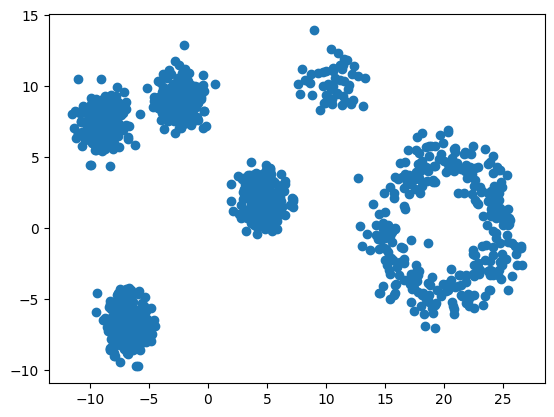

In [133]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

Silhouette score:  0.7251181630059241


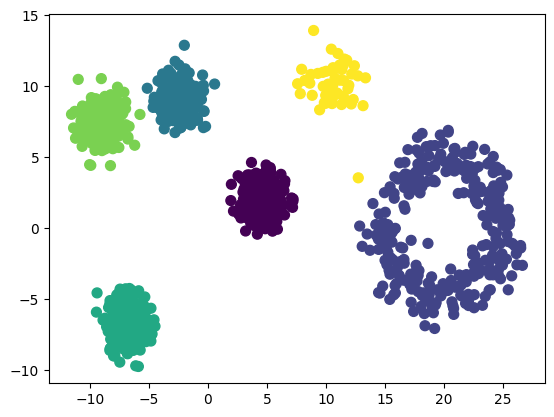

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6,init= 'k-means++',n_init=21, max_iter=100, algorithm="elkan")
y_kmeans = kmeans.fit_predict(X)
kmeans_Score = silhouette_score(X, y_kmeans)
print("Silhouette score: ", kmeans_Score)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

Silhouette score:  0.7256900714288006


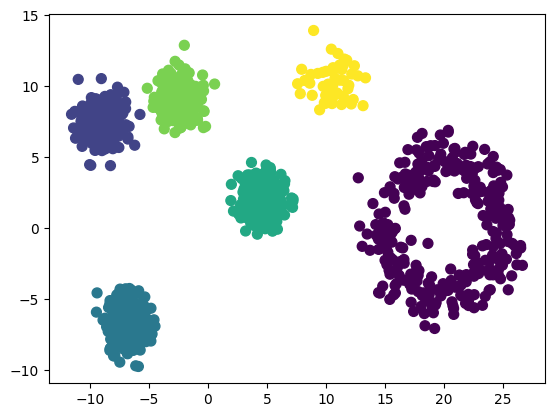

In [135]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering = AgglomerativeClustering(n_clusters = 6 , metric='euclidean', linkage='ward')
labels = clustering.fit_predict(X)
agglomerative_Score = silhouette_score(X,labels)
print("Silhouette score: ", agglomerative_Score)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Silhouette score:  0.6923413939127293


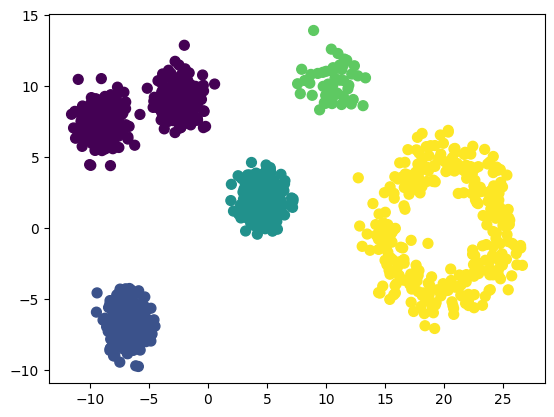

In [136]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=2.67 , min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
dbscan_Score = silhouette_score(X,dbscan_labels)
print("Silhouette score: ", dbscan_Score)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.show()

6. Compare the results and choose the best method for the data


In [137]:
if kmeans_Score > agglomerative_Score and kmeans_Score > dbscan_Score:
  print("KMeans is the best method for the data")
elif agglomerative_Score > kmeans_Score and agglomerative_Score > dbscan_Score:
  print("Agglomerative Clustering is the best method for the data")
else:
  print("DBSCAN is the best method for the data")

Agglomerative Clustering is the best method for the data
